###### In this notebook I attempt to fit my data using a neural network with the keras library. I import my cleaned data, perform a train-test split, make a simple neural network and build my model. Then I compare the predictions of my model with the actual results of my model to see if I can find issues in the predictions.

In [23]:
import pandas as pd
import numpy as np
import nltk
import re
sent_token = nltk.sent_tokenize
import csv  
from nltk import sent_tokenize, word_tokenize, pos_tag
import re
from sklearn.feature_extraction.text import CountVectorizer
wpt = nltk.WordPunctTokenizer()


file_path_comments = r'~/Documents/Springboard/Springboard/Data/cleaned_comment_data.csv'

#file_path_comments = r'/mnt/c/Users/msteele9/Documents/Springboard/Springboard/Data/cleaned_comment_data.csv'
clean_comments = pd.read_csv(file_path_comments, index_col = False)

In [24]:
from sklearn.model_selection import train_test_split
import random
from datetime import datetime

X = clean_comments['commentBody']
y = clean_comments['recommendations']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=random.seed(datetime.now()))

In [25]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
 
vectorizer = CountVectorizer(binary=False, stop_words=stopwords.words('english'), 
                             lowercase=True, min_df=1, max_df=0.9, max_features=5000)
X_train_onehot = vectorizer.fit_transform(X_train)

In [69]:
from keras.models import Sequential
from keras.layers import Dense
 
model = Sequential()
 
model.add(Dense(units=500, activation='tanh', input_dim=len(vectorizer.get_feature_names())))

model.add(Dense(units=400, activation='relu'))

model.add(Dense(units=1, activation='relu'))
 
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_17 (Dense)             (None, 500)               2500500   
_________________________________________________________________
dense_18 (Dense)             (None, 400)               200400    
_________________________________________________________________
dense_19 (Dense)             (None, 1)                 401       
Total params: 2,701,301
Trainable params: 2,701,301
Non-trainable params: 0
_________________________________________________________________


In [70]:
model.fit(X_train_onehot, y_train, 
          epochs=10, batch_size=1000, verbose=1, 
          validation_split=0.2)

Train on 32000 samples, validate on 8000 samples
Epoch 1/10
32000/32000 [==============================] - 2s 52us/step - loss: 8605.2684 - acc: 0.0747 - val_loss: 9124.0113 - val_acc: 0.0673
Epoch 2/10
32000/32000 [==============================] - 1s 38us/step - loss: 8161.9542 - acc: 0.1004 - val_loss: 9255.7255 - val_acc: 0.1366
Epoch 3/10
32000/32000 [==============================] - 1s 38us/step - loss: 7302.0696 - acc: 0.1634 - val_loss: 9593.5923 - val_acc: 0.0948
Epoch 4/10
32000/32000 [==============================] - 1s 38us/step - loss: 5922.4297 - acc: 0.0805 - val_loss: 10324.6375 - val_acc: 0.0888
Epoch 5/10
32000/32000 [==============================] - 1s 38us/step - loss: 4421.9590 - acc: 0.0851 - val_loss: 10194.3031 - val_acc: 0.0716
Epoch 6/10
32000/32000 [==============================] - 1s 39us/step - loss: 3420.5595 - acc: 0.0858 - val_loss: 11090.9104 - val_acc: 0.0786
Epoch 7/10
32000/32000 [==============================] - 1s 39us/step - loss: 2930.2457 -

In [71]:
X_test_onehot = vectorizer.fit_transform(X_test)

In [72]:
scores = model.evaluate(X_test_onehot, y_test, verbose=1)
print("Accuracy:", model.metrics_names, scores[0], scores[1])

10000/10000 [==============================] - 1s 54us/step
Accuracy: ['loss', 'acc'] 7864.382170812988 0.2005


###### Now let's examine the predictions of my model. First I example five sample data points, and then I plot all of my data vs. their predicted values.

In [73]:
X_train[:5]

47379    I still have my doubts that President Assad us...
36553    And what did Obama do about Syria and Assad......
14178    And what evidence, Elizabeth, did Todd G. cite...
8568     This Homeland season for me  is  probably my f...
36666    "Ms. Chao........ “saddling future generations...
Name: commentBody, dtype: object

In [74]:
prediction = model.predict(X_test_onehot)
print((prediction[:5]))

[[0.       ]
 [0.       ]
 [1.7339303]
 [0.       ]
 [0.       ]]


In [75]:
print(y_test.head(5))

30800    0.0
5605     9.0
29016    0.0
28353    2.0
18366    4.0
Name: recommendations, dtype: float64


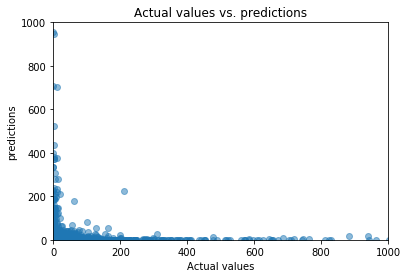

In [76]:
import matplotlib.pyplot as plt

# Plot
plt.scatter(y_test, prediction, alpha=0.5)
plt.title('Actual values vs. predictions')
plt.xlabel('Actual values')
plt.ylabel('predictions')

axes = plt.gca()
axes.set_xlim([0,1000])
axes.set_ylim([0,1000])
#axes.set_xscale('log')

plt.show()

In [77]:
print(y_test.median())
print(y_test.mean())
print(prediction.mean())

3.0
16.1987
4.535307


Text(0.5, 1.0, 'Predictions')

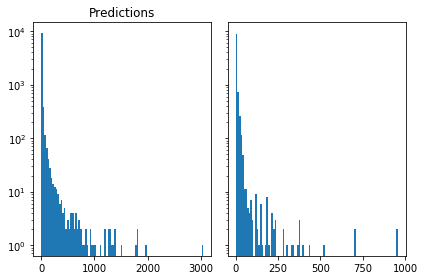

In [78]:
n_bins = 100

# Generate a normal distribution, center at x=0 and y=5
x = y_test
y = prediction

fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)


# We can set the number of bins with the `bins` kwarg
axs[0].hist(x, bins=n_bins)
axs[0].set_yscale('log')
axs[0].set_title('Actual values')
axs[1].hist(y, bins=n_bins)
axs[1].set_yscale('log')
axs[0].set_title('Predictions')

It seems that our predictions fall within a range of 0 - 200, while the actual data runs from 0 - 1000 with a long tail. 